### `Project 2 - Thera Bank Personal Loan Campaign`

- This project on Supervised Learning is conducted on a data set of Banks which is Related to the BFSI industry. This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Preparing the data to train a model

- Training and making predictions using a classification model

- Model evaluation


### `Domain` 
- Banking


### `Datasets Information:`


*Bank_Personal_Loan_Modelling.csv:* 

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer 
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month 
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?


### `Steps and tasks:`
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
  Number of unique in each column?
  Number of people with zero mortgage?
  Number of people with zero credit card spending per month?
  Value counts of all categorical columns.
  Univariate and Bivariate
  Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6. Give conclusion related to the Business understanding of your model? (5 marks)

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import numpy as np                     # import numpy library
import pandas as pd                    # import pandas library
import matplotlib.pyplot as plt        # import matplotlib library
%matplotlib inline
import seaborn as sns                  # import seaborn library
from sklearn.model_selection import train_test_split  # import function of data split
from sklearn import metrics            # calculate accuracy measures and confusion matrix
from sklearn.linear_model import LogisticRegression # import logistic regression for classification
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
# import the capabilities to compute the scores

In [2]:
Bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')       # read rating data

In [3]:
Bank.head()   # Display the dataframe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
Bank.info()   # Check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
Bank.shape            # Check Shape

(5000, 14)

In [6]:
Bank.isnull().sum()          # Check Null Values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no NA data and all data are number types. So we do not need to do additional changes to the dataframe.

In [7]:
Bank.describe().transpose()             # statistic Summary

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

In [8]:
print('Count of unique value in each column :')
Bank.nunique()

Count of unique value in each column :


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
print('Number of people with zero mortgage?')
len(Bank[Bank['Mortgage']==0])

Number of people with zero mortgage?


3462

In [10]:
print('Number of people with zero credit card spending per month?')
len(Bank[Bank['CCAvg']==0])

Number of people with zero credit card spending per month?


106

In [11]:
print('Value counts of all categorical columns: Family, Education, Personal Loan, Securities Acount, CD Acount, Online, Credict Card')
List = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for x in List:
    print(Bank.groupby(x)[x].count())                                 # count categorical columns

Value counts of all categorical columns: Family, Education, Personal Loan, Securities Acount, CD Acount, Online, Credict Card
Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64
Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
Online
0    2016
1    2984
Name: Online, dtype: int64
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


In [12]:
for x in List:
    print(Bank[x].value_counts(normalize=True))          # count percentage of the categorical columns

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
0    0.904
1    0.096
Name: Personal Loan, dtype: float64
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
1    0.5968
0    0.4032
Name: Online, dtype: float64
0    0.706
1    0.294
Name: CreditCard, dtype: float64


### 2.1 Univariate and Bivariate

#### Univeriate Analysis

In [13]:
Bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Insight: ID and Zip Code should have no impact on the results

In [14]:
Bank_df = Bank.drop(['ID','ZIP Code'], axis =1 ) # dropping items not related

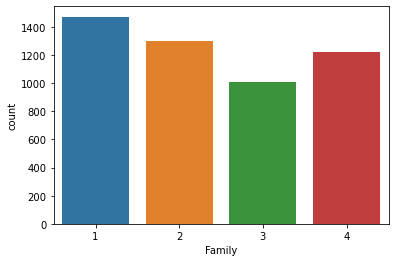

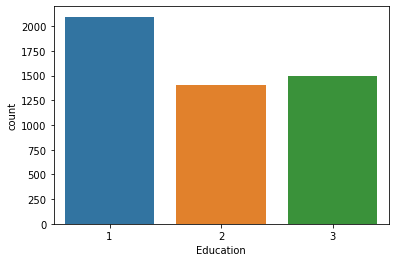

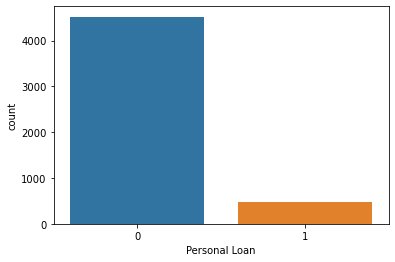

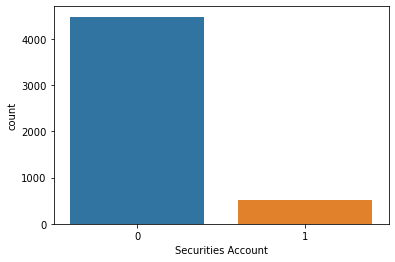

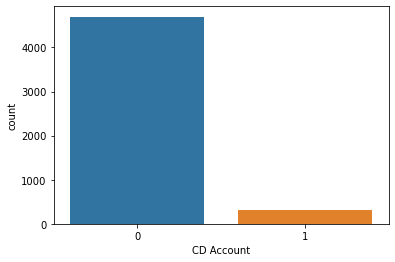

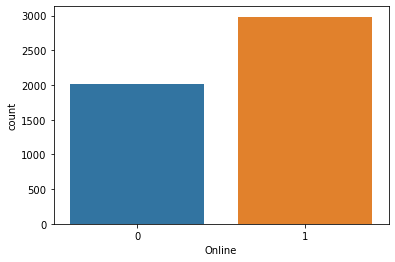

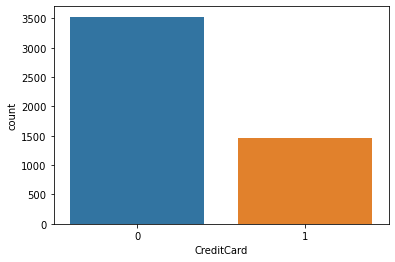

In [15]:
List1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for x in List1:
    sns.countplot(Bank[x])
    plt.show()

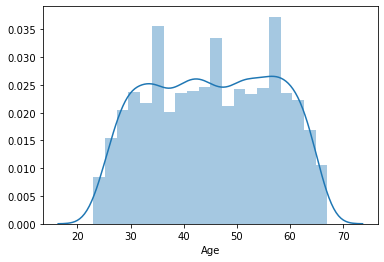

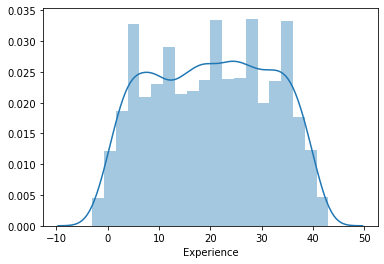

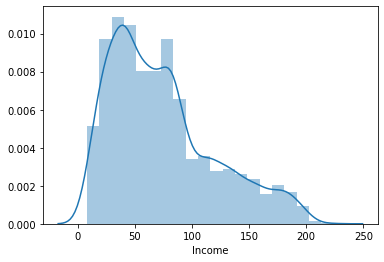

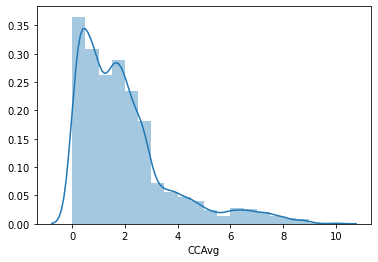

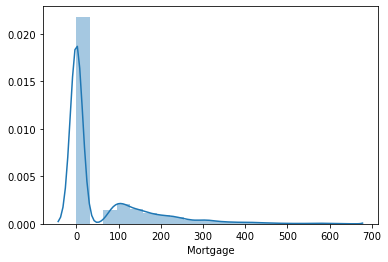

In [16]:
List2 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for x in List2:
    sns.distplot(Bank[x], bins = 20)
    plt.show()

#### Bivariate Analysis

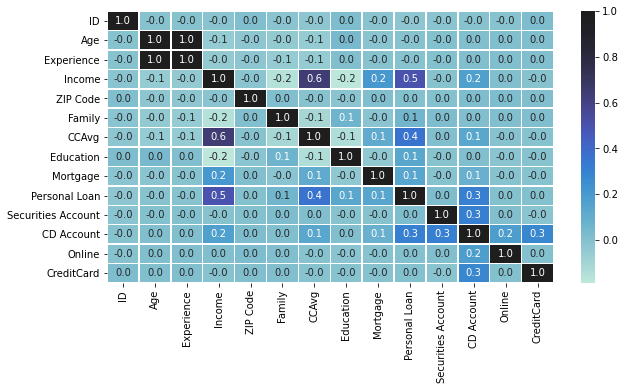

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(Bank.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [18]:
List3 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage','Personal Loan']
Bank_df[List3].groupby(['Personal Loan']).mean()                       # Check status and relation for value columns 

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.132301,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [19]:
Bank_df[List3].groupby(['Personal Loan']).median()       # Check status and relation for value columns

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


##### Insight: 
- No major difference of age on personal loan
- No major difference of experience on peronal loan

In [20]:
for x in List:   
    print(pd.crosstab(Bank_df[x],Bank_df['Personal Loan'],normalize='columns'))  # Check status for categorical columns

Personal Loan         0         1
Family                           
1              0.301991  0.222917
2              0.263274  0.220833
3              0.194027  0.277083
4              0.240708  0.279167
Personal Loan         0         1
Education                        
1              0.443142  0.193750
2              0.270133  0.379167
3              0.286726  0.427083
Personal Loan    0    1
Personal Loan          
0              1.0  0.0
1              0.0  1.0
Personal Loan              0      1
Securities Account                 
0                   0.897788  0.875
1                   0.102212  0.125
Personal Loan         0         1
CD Account                       
0              0.964159  0.708333
1              0.035841  0.291667
Personal Loan         0        1
Online                          
0              0.404204  0.39375
1              0.595796  0.60625
Personal Loan         0         1
CreditCard                       
0              0.706416  0.702083
1              0

##### Insight: 
- Family number affect personal loan status
- Education affect personal loan status
- Security account slightly affect loan status 
- CD Accout affect loan status
- Online does not have major impact on loan status
- Credit card does not have major impact on loan status

### 2.2 Get Model Ready

In [43]:
Bank_df2 = Bank.drop(['ID','ZIP Code','Age','Experience','Online','CreditCard'], axis =1 ) # dropping items not related
# Encoding Education 
Bank_df2['Under'] = Bank_df2['Education'].apply(lambda x:1 if x==1 else 0)      # Where Education value was '1'
Bank_df2['Graduate'] = Bank_df2['Education'].apply(lambda x:1 if x==2 else 0)      # Where Education value was '2'
Bank_df2.drop('Education', axis=1, inplace = True)
Bank_df2

,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Under,Graduate
0,49,4,1.6,0,0,1,0,1,0
1,34,3,1.5,0,0,1,0,1,0
2,11,1,1.0,0,0,0,0,1,0
3,100,1,2.7,0,0,0,0,0,1
4,45,4,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,0,0,0,0,0,0
4996,15,4,0.4,85,0,0,0,1,0
4997,24,2,0.3,0,0,0,0,0,0
4998,49,3,0.5,0,0,0,0,0,1


### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks) 


In [44]:
X = Bank_df2.drop('Personal Loan',axis=1)     # Feature columns
Y = Bank_df2['Personal Loan']                 # Prediction (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

x_train

,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Under,Graduate
717,94,3,0.50,0,0,0,1,0
2496,32,3,0.70,141,0,0,0,1
2469,89,1,0.10,307,0,0,0,1
1375,179,1,2.90,0,0,0,0,0
2742,89,2,0.40,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4307,128,4,6.00,0,0,0,0,0
2550,20,1,0.50,102,0,0,0,0
537,131,1,4.90,0,0,0,0,0
1220,165,2,8.00,0,0,0,1,0


In [45]:
y_train

717     0
2496    0
2469    0
1375    1
2742    0
       ..
4307    1
2550    0
537     1
1220    0
4271    0
Name: Personal Loan, Length: 3500, dtype: int64

In [46]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(Bank.index)) * 100))   # check whether the split is correct
print("{0:0.2f}% data is in test set".format((len(x_test)/len(Bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [47]:
# Fit the model on train
model = LogisticRegression(solver="liblinear",random_state = 42)
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.047515  0.460742  0.146937  0.000805 -0.315511  2.143721 -3.359278   

          7  intercept  
0 -0.136404  -7.714657  


In [48]:
model_score_train = model.score(x_train, y_train)
print('Training Accuracy', model_score_train)                           # Find the model score on the training data

Training Accuracy 0.9562857142857143


In [49]:
model_score_test = model.score(x_test, y_test)
print('Testing Accuracy', model_score_test)                                # Find the model score on the testing data

Testing Accuracy 0.9593333333333334


In [50]:
cm = confusion_matrix( y_test, y_predict)
cm                                                    # calculate confusion matrix

array([[1351,   11],
       [  50,   88]], dtype=int64)

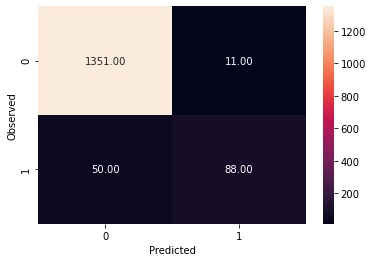

In [51]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )  # Plot confusion matrix as heat map
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [52]:
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.6376811594202898
Precision: 0.8888888888888888
F1 Score: 0.7426160337552743
Roc Auc Score: 0.8148024005618336


### 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [53]:
df5=coef_df.drop(['intercept'], axis =1)            # Find the coefficients
df5.columns=list(x_train.copy().columns)
df5                                                 # Output a dataframe with attributes as column names

,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Under,Graduate
0,0.047515,0.460742,0.146937,0.000805,-0.315511,2.143721,-3.359278,-0.136404


In [54]:
Listx = ['ID','ZIP Code','Age','Experience','Online','CreditCard']  # Dropped features, which are not related with the model
for x in Listx:
    df5[x]=0
df5

,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Under,Graduate,ID,ZIP Code,Age,Experience,Online,CreditCard
0,0.047515,0.460742,0.146937,0.000805,-0.315511,2.143721,-3.359278,-0.136404,0,0,0,0,0,0


In [55]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              1 non-null      float64
 1   Family              1 non-null      float64
 2   CCAvg               1 non-null      float64
 3   Mortgage            1 non-null      float64
 4   Securities Account  1 non-null      float64
 5   CD Account          1 non-null      float64
 6   Under               1 non-null      float64
 7   Graduate            1 non-null      float64
 8   ID                  1 non-null      int64  
 9   ZIP Code            1 non-null      int64  
 10  Age                 1 non-null      int64  
 11  Experience          1 non-null      int64  
 12  Online              1 non-null      int64  
 13  CreditCard          1 non-null      int64  
dtypes: float64(8), int64(6)
memory usage: 240.0 bytes


In [56]:
z = x_test.copy()                                         # Add the predicted column to the test data
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Under,Graduate,Observed Loan Status,Predicted Loan Status
3406,34,3,2.0,0,0,0,0,0,0,0
757,81,3,1.8,0,1,0,0,1,0,0
3624,70,1,1.4,0,0,0,0,0,0,0
4544,80,3,2.5,0,0,0,1,0,0,0
3235,39,2,1.6,0,0,0,0,0,0,0


In [57]:
df6 = z[z['Observed Loan Status']!=z['Predicted Loan Status']]  # Show predicted class is not equal to the observed class
df6

,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Under,Graduate,Observed Loan Status,Predicted Loan Status
4301,130,4,1.1,281,0,1,1,0,1,0
4575,115,2,0.5,0,0,0,0,0,1,0
78,133,2,2.6,0,0,0,0,0,1,0
3383,135,3,4.1,213,0,0,1,0,1,0
459,200,2,3.0,458,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1499,91,1,4.3,0,0,1,0,1,1,0
927,95,3,3.7,138,0,0,0,1,1,0
3084,129,3,0.7,0,0,0,0,1,1,0
4163,108,4,1.9,0,0,0,0,1,1,0


### 6. Give conclusion related to the Business understanding of your model? (5 marks)

##### `key Features for Prediction`

Based on the univariate, bivariate analysis and data training and testing, the key features affected the model performance include Income, Family, CCAvg, Education, Mortgage, Securities Account and CD Account. ID, ZIP Code, Age, Experience, Online, CreditCard showed zero correlations with personal loan status, which contribute little to the prediction. 


##### `Model Performance`
Confusion matrix was plotted. 

- For True Positive (observed=1,predicted=1):*

Predicted that customer will accept personal loan and the customer accepted.

- False Positive (observed=0,predicted=1):*

Predicted that customer will accept personal loan, but the customer did not accept. 

- True Negative (observed=0,predicted=0):*

Predicted that customer will not accept personal loan and the customer did not accept. 

- False Negative (observed=1,predicted=0):*

Predicted customer will not accept personal loan, but the customer accepted. 

The model has testing accuracy of 95.9%, corrected prediction/total cases. 
Recall score is 0.63: Among all the customer accepted the personal loan, the model successfully predicted 63%.
Precision score is 0.88: Among all predicted acceptance cases, 88% of the customers actually accepted the personal loan. 

The F1 score is 0.742, and the Roc Auc Score is 0.815.

##### `Important Metric`

The bank wants to spend less to promote personal loan services, but wants a high success rate of actual acceptance. This means less number of false positive. Precision is the important metrix in this case. 

